# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.api as sms
%matplotlib inline

import plotly.graph_objects as go

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([-3.12912768e-01, -3.38983701e-01, -1.97188576e-01,  3.91621600e-02,
       -3.36751729e-01, -1.07496589e+00, -2.13347005e-01,  1.14014017e+00,
        1.85080704e+00,  7.93430547e-01, -9.56678525e-01, -1.83107390e-01,
       -2.57900486e-01,  9.13591390e-01, -1.16632937e+00, -1.94534976e+00,
        9.82740341e-01, -1.15439660e+00,  1.91420826e+00,  6.34505217e-01,
        1.34106768e-02, -8.93701216e-01,  6.52812912e-01,  4.36051831e-01,
        4.12865621e-02, -5.11110194e-01,  1.82707417e+00,  5.18344240e-02,
        7.66300813e-01, -6.70992001e-02, -8.79399796e-01,  4.57155160e-01,
        7.09687916e-01, -7.25443806e-01, -2.03299397e+00, -1.63320095e+00,
       -1.78313204e+00,  1.29491137e-01,  7.04446198e-01,  2.10058493e+00,
       -3.62877526e-01, -5.98525170e-01, -2.04119349e+00,  1.81532295e+00,
       -1.05283306e+00, -1.62828094e+00,  3.34918270e-01, -2.65594048e+00,
       -1.88953381e+00, -1.87542966e+00,  8.74354193e-01,  1.22187562e-02,
        4.07223190e-01,  

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

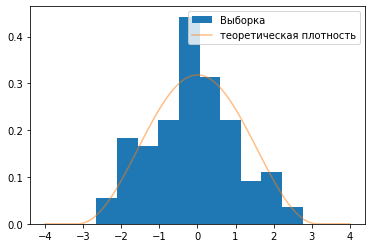

In [6]:
# ваш код тут
plt.hist(sample, density=True, label='Выборка')
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.12886751323384554
1.2974441614760135


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [8]:
# Рассмотрим распределение Максвелла
maxwell_rv = sts.maxwell()
fig = go.Figure()

for N in [10, 100, 1000, 1000]:
    means = []
    for i in range(10000):
        means.append(np.mean(maxwell_rv.rvs(N)))
    fig.add_trace(go.Histogram(x=means, histnorm='probability density', name=f'N={N}'))

    norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
    x = np.linspace(0.75,2.25,1000)
    pdf = norm_rv.pdf(x)
    fig.add_trace(go.Scatter(x=x, y=pdf, name=f'Нормальное распределение при N={N}'))

fig.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**
Для Максвелловского распределения апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [9]:
data = pd.read_csv('data/telecom_churn.csv')

In [10]:
data = data[['total day calls', 'churn']]

In [11]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data[data['churn'] == True]['total day calls'], name=f'Ушел'))
fig.add_trace(go.Histogram(x=data[data['churn'] == False]['total day calls'], name=f'Остался'))

In [12]:
print('Аналитический метод\n')
false_data = data[data['churn'] == False]['total day calls']
left_false = false_data.mean() - 2 * false_data.std(ddof=1) / np.sqrt(len(false_data)-1)
right_false = false_data.mean() + 2 * false_data.std(ddof=1) / np.sqrt(len(false_data)-1)
print(f"Доверительный интервал среднего значения для оставшихся клиентов: [{left_false}, {right_false}]")

true_data = data[data['churn'] == True]['total day calls']
left_true = false_data.mean() - 2 * true_data.std(ddof=1) / np.sqrt(len(true_data)-1)
right_true = false_data.mean() + 2 * true_data.std(ddof=1) / np.sqrt(len(true_data)-1)
print(f"Доверительный интервал среднего значения для ушедших клиентов: [{left_true}, {right_true}]\n")

print('Использование функции из библиотеки statsmodels\n')
print(f"Доверительный интервал среднего значения для оставшихся клиентов: {list(sms.DescrStatsW(false_data, ddof=1).tconfint_mean())}")
print(f"Доверительный интервал среднего значения для ушедших клиентов: {list(sms.DescrStatsW(true_data, ddof=1).tconfint_mean())}")

Аналитический метод

Доверительный интервал среднего значения для оставшихся клиентов: [99.54120841058203, 101.02510737889166]
Доверительный интервал среднего значения для ушедших клиентов: [98.3170635827869, 102.24925220668679]

Использование функции из библиотеки statsmodels

Доверительный интервал среднего значения для оставшихся клиентов: [99.55587935955204, 101.01043642992165]
Доверительный интервал среднего значения для ушедших клиентов: [99.4058170618902, 103.26499039152596]
